<h3>Goal:</h3>
The goal of this code is to visualize information about the movie industry, specifically about what the best angle is for a new competitor.


<h4>Some questions we want to answer with this code:</h4>

Generally/historically, What is the correlation between genres and domestic(/worldwide) box office

What is the correlation between budget and profit over time for a given genre or set of genres

(Potentially should also ask what the correlation between budget and revenue is as well - the goal when entering the scene might just be to maximize visibility, which revenue is a better measure of)

What is the correlation between genre and worldwide profit generally and within specific budget brackets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

movies = pd.read_csv("zippedData/movies-genre-onehot.csv")
# drop duplicate index
movies.drop(columns=[movies.columns[0]], inplace=True)
# Copy pasted from cleaning-data file. ideally itd be passed in
genres = ['Action', 'Adventure', 'Fantasy', 'Sci-Fi', 'Mystery',
          'Thriller', 'Comedy', 'Horror', 'Drama', 'Romance',
          'Music', 'Musical', 'Sport', 'Animation', 'War',
          'Biography', 'Crime', 'Family', 'Western', 'Documentary',
          'History', 'Film-Noir', 'Short', 'Adult', 'News',
          'Talk-Show','Reality-TV']

In [2]:
movies

,title,domestic,international,worldwide,budget,year,reference,Action,Adventure,Fantasy,...,Family,Western,Documentary,History,Film-Noir,Short,Adult,News,Talk-Show,Reality-TV
0,Star Wars: Episode IV - A New Hope,307263857,195751992,503015849,11000000.0,1977,/release/rl2759034369/?ref_=bo_yld_table_1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,The Deep,47346365,0,47346365,NaN,1977,/release/rl3561784833/?ref_=bo_yld_table_2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,The Spy Who Loved Me,46838673,0,46838673,NaN,1977,/release/rl2004059649/?ref_=bo_yld_table_3,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,"Oh, God!",41687243,0,41687243,NaN,1977,/release/rl2137425409/?ref_=bo_yld_table_4,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Exorcist II: The Heretic,30749142,0,30749142,NaN,1977,/release/rl1582335489/?ref_=bo_yld_table_5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19657,I Do Not Care If We Go Down in History as Barb...,11307,27864,39171,NaN,2020,/release/rl3876095489/?ref_=bo_yld_table_302,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19658,The Load,28410,0,28410,NaN,2020,/release/rl1460372993/?ref_=bo_yld_table_303,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19659,Asako I & II,25559,601543,627102,NaN,2020,/release/rl1359513089/?ref_=bo_yld_table_304,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19660,Chained for Life,17431,0,17431,NaN,2020,/release/rl1292600833/?ref_=bo_yld_table_305,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print("correlation between each column and row")
display(movies.corr())
dom_row = movies.corr()["domestic"][genres]
print("highest correlation between any genre and domestic box office:")
dom_row[dom_row.max() == dom_row]

correlation between each column and row


,domestic,international,worldwide,budget,year,Action,Adventure,Fantasy,Sci-Fi,Mystery,...,Family,Western,Documentary,History,Film-Noir,Short,Adult,News,Talk-Show,Reality-TV
domestic,1.000000,0.841549,0.937195,0.610868,-0.053530,0.221998,0.335359,0.202677,0.210252,0.026942,...,0.193331,0.006804,-0.140347,-0.043572,-0.007971,-0.001675,-0.004050,-0.024921,-0.002860,-0.003979
international,0.841549,1.000000,0.977113,0.673754,0.082771,0.232150,0.357388,0.211979,0.201072,0.027777,...,0.166411,-0.000221,-0.111682,-0.022535,-0.006220,-0.011837,-0.002931,-0.018202,-0.002073,0.001303
worldwide,0.937195,0.977113,1.000000,0.673913,0.032368,0.237324,0.362834,0.216691,0.212631,0.028546,...,0.183587,0.002537,-0.127383,-0.031710,-0.007155,-0.008303,-0.003487,-0.021567,-0.002465,-0.000726
budget,0.610868,0.673754,0.673913,1.000000,0.183884,0.366699,0.518266,0.305675,0.286824,-0.076754,...,0.230199,0.026639,-0.091196,0.007127,NaN,-0.018964,NaN,-0.014979,NaN,NaN
year,-0.053530,0.082771,0.032368,0.183884,1.000000,-0.029930,-0.027611,-0.020553,-0.037862,0.002289,...,-0.011782,-0.022140,0.200641,0.061887,0.007160,0.016705,0.004946,0.044439,0.001354,0.011009
Action,0.221998,0.232150,0.237324,0.366699,-0.029930,1.000000,0.304210,0.079517,0.277110,-0.001382,...,-0.027784,0.047093,-0.160725,-0.016584,-0.008928,-0.039063,-0.004208,-0.021974,-0.002975,0.009984
Adventure,0.335359,0.357388,0.362834,0.518266,-0.027611,0.304210,1.000000,0.333949,0.263205,-0.008983,...,0.382561,0.062513,-0.113596,-0.018518,-0.000377,0.035386,-0.003667,-0.020591,-0.002593,-0.003667
Fantasy,0.202677,0.211979,0.216691,0.305675,-0.020553,0.079517,0.333949,1.000000,0.108403,0.045036,...,0.366492,-0.012530,-0.125822,-0.066558,-0.006659,-0.017214,-0.003139,-0.019765,-0.002219,-0.003139
Sci-Fi,0.210252,0.201072,0.212631,0.286824,-0.037862,0.277110,0.263205,0.108403,1.000000,0.071118,...,0.056532,-0.015160,-0.107888,-0.064072,-0.005776,0.003164,-0.002722,-0.017142,-0.001925,-0.002722
Mystery,0.026942,0.027777,0.028546,-0.076754,0.002289,-0.001382,-0.008983,0.045036,0.071118,1.000000,...,-0.028415,-0.014198,-0.100993,-0.035427,0.011703,-0.026027,-0.002907,-0.015285,-0.002055,-0.002907


highest correlation between any genre and domestic box office:


Adventure    0.335359
Name: domestic, dtype: float64

In [4]:
# creating a dataframe that only has movies for which we have data
# about the budget, and adding the profit column
budget_df = movies[~np.isnan(movies["budget"])].copy()
budget_df["profit"] = budget_df["worldwide"] - budget_df["budget"]
budget_df.head()

,title,domestic,international,worldwide,budget,year,reference,Action,Adventure,Fantasy,...,Western,Documentary,History,Film-Noir,Short,Adult,News,Talk-Show,Reality-TV,profit
0,Star Wars: Episode IV - A New Hope,307263857,195751992,503015849,11000000.0,1977,/release/rl2759034369/?ref_=bo_yld_table_1,1,1,1,...,0,0,0,0,0,0,0,0,0,492015849.0
8,Close Encounters of the Third Kind,116395460,171700000,288095460,20000000.0,1977,/release/rl340428289/?ref_=bo_yld_table_9,0,0,0,...,0,0,0,0,0,0,0,0,0,268095460.0
9,Grease,159978870,206200000,366178870,6000000.0,1978,/release/rl2052556289/?ref_=bo_yld_table_1,0,0,0,...,0,0,0,0,0,0,0,0,0,360178870.0
11,Close Encounters of the Third Kind,116395460,171700000,288095460,20000000.0,1978,/release/rl340428289/?ref_=bo_yld_table_3,0,0,0,...,0,0,0,0,0,0,0,0,0,268095460.0
16,Star Wars: Episode IV - A New Hope,307263857,195751992,503015849,11000000.0,1978,/release/rl2759034369/?ref_=bo_yld_table_8,1,1,1,...,0,0,0,0,0,0,0,0,0,492015849.0


In [5]:
# create dataframe with the correlation between each genre and
# each revenue measurement
corr_df = budget_df.corr()[["domestic","international","worldwide"]].loc[genres]
corr_df = corr_df[~np.isnan(corr_df["domestic"])]
corr_df.sort_values("worldwide",ascending=False,inplace=True)
corr_df

,domestic,international,worldwide
Adventure,0.339835,0.401471,0.392431
Action,0.208280,0.238079,0.235271
Sci-Fi,0.215483,0.220562,0.226476
Fantasy,0.194374,0.217767,0.216659
Animation,0.157859,0.166024,0.168834
Family,0.153065,0.143445,0.152176
Musical,0.038065,0.048855,0.046511
News,-0.011603,-0.008352,-0.009877
Short,-0.014859,-0.010339,-0.012414
Western,-0.018858,-0.014369,-0.016576


In [6]:
def correlater(genres,budget_df,correlatee="profit",minmoviecount=30,corr2=False,which=(True,True),save=True):
    """
    Takes a list of genres (or other viable columns) and the dataframe
    and graphs the correlation between budget and profit (or revenue)
    for each year. A given year won't have a data point if there were
    fewer than minmoviecount movies of the given genre in that year.
    If there are more than minmoviecount movies, that point will be 
    represented with a marker.
    which denotes which plot(s) to graph: (True,False) plots the
    year-correlation graph but not the year-count graph for example.
    corr2=True will show correlation between the year and the correlation.
    
    returns NoneType
    (Be sure to capitalize first letter of genres passed!)
    """
    plotcorr,plotcount = which
    #all this stuff lets us choose which graph to display or to display both
    if plotcount and plotcorr:
        fig, axes = plt.subplots(2,1,figsize=(15,12))
        ax=axes[0]
        ax2=axes[1]
        el=False
    else:
        el=True
        fig, axe = plt.subplots(figsize=(15,6))
        
    if plotcount:
        if el:
            ax2=axe
        ax2.set_title("Number of Movies Each Year of each Genre")
        ax2.set_xlabel("Year")
        ax2.set_ylabel("Count")
    if plotcorr:
        if el:
            ax=axe
        ax.set_title("Correlation between Budget and {} by Year for Different Genres".format(correlatee.capitalize()))
        ax.set_xlabel("Year")
        ax.set_ylabel("Correlation")
        #do this to make every year tick show:
        ax.set_xticks(range(min(budget_df["year"]),max(budget_df["year"])+1))

    
    # we axplot for each genre separately, and need to do groupby stuff so we 4loop
    for genre in genres:
        # we make take the movies from budget_df that are in the given genre (!=0)
        # and copy that subset so that we don't get weird behavior when modifying it
        current_df = budget_df[budget_df[genre] != 0].copy()
        # make sure there are movies in the df
        if len(current_df) > 0:
            # we groupby year and want columns budget and profit, and get the correlation between them
            # to which we apply that iloc so that we dont get a bunch of 2x2 dfs for each year (????)
            current_corr = current_df.groupby("year")[["budget",correlatee]].corr().iloc[0::2,-1]
            # if there is exactly 1 movie of a given genre in a year itll
            # result in a NaN so we drop it just in case
            current_corr = current_corr.dropna()
            # make index be just the year
            current_corr.index = [index[0] for index in current_corr.index]
            
            # this try lets us pass the function year instead of a genre to be sneaky
            # we're counting so we only use data from years where therere enough movies
            try:
                current_count = current_df.groupby(["year"]).count()[genre]
                labelhold=genre
            except KeyError:
                labelhold = None
                ax.set_title("Correlation between Budget and {} by Year for all Genres".format(correlatee.capitalize()))
                current_count = current_df.groupby(["year"]).count()["budget"]
            current_corr = current_corr[current_count>=minmoviecount]
            current_corr2 = pd.DataFrame({'year':current_corr.index, 'budget {} corr'.format(correlatee):current_corr.values})
            currcorr = current_corr2.corr()
            if plotcorr:
                # using the marker lets us see when years are skipped because of too few movies
                ax.plot(current_corr.index,current_corr,marker="o",label=labelhold)
            if corr2:
                print(genre)
                #print("correlation groupby:")
                #display(current_corr)
                #print("movies of given genre per year:")
                #display(current_count)
                print("correlation between year and correlation:")
                display(currcorr)
            if plotcount == True:
                ax2.plot(current_count.index,current_count,label=labelhold)
        #legend after forloop so we can add them all everything
        if plotcorr:
            ax.legend()
        if plotcount:
            ax2.legend()
    if save:
        try:
            fig.savefig("figures/{}.png".format(genres+[correlatee]))
        except:
            fig.savefig("figures/all-genres.png")


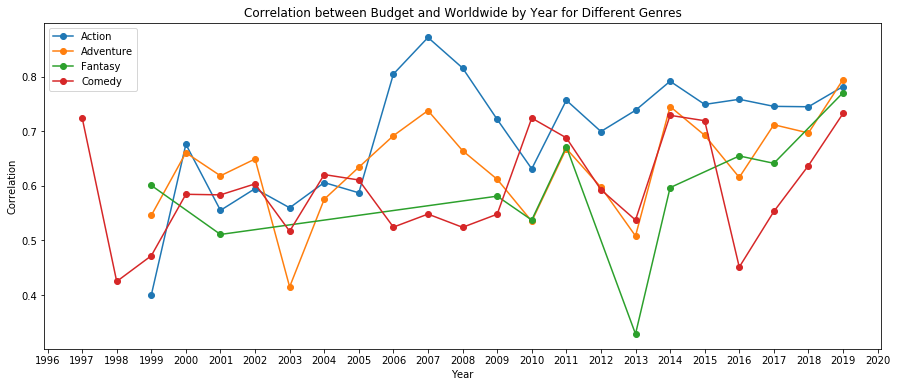

In [7]:
correlater(["Action","Adventure","Fantasy","Comedy"],budget_df,correlatee="worldwide",which=(True,False))

No handles with labels found to put in legend.


year
correlation between year and correlation:


,year,budget worldwide corr
year,1.000000,0.713269
budget worldwide corr,0.713269,1.000000


No handles with labels found to put in legend.


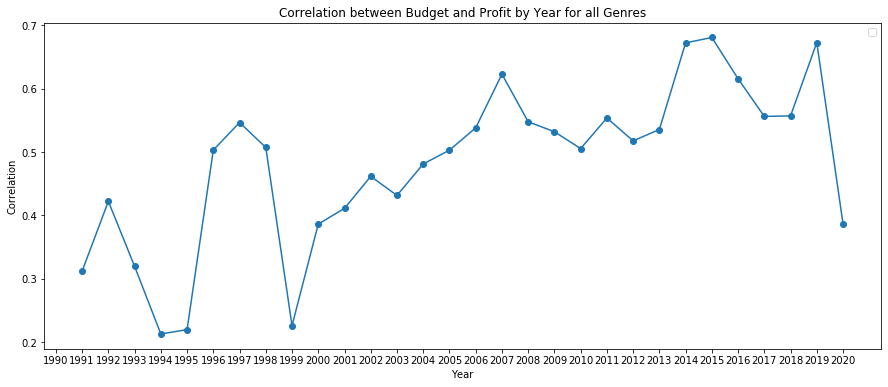

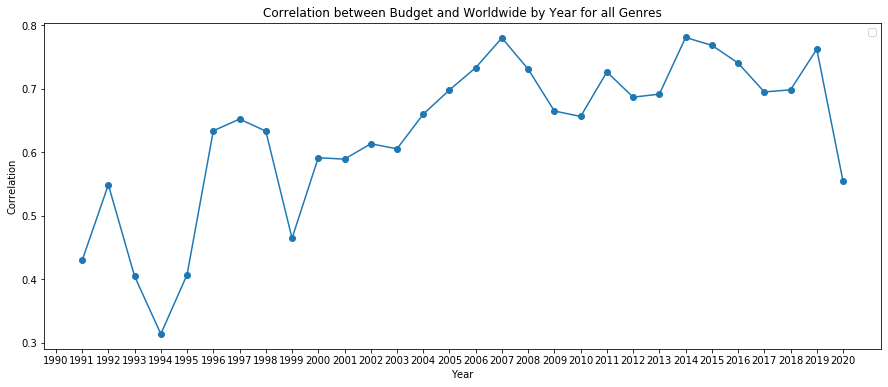

In [8]:
correlater(["year"],budget_df, which=(True,False))
correlater(["year"],budget_df, "worldwide",corr2=True, which=(True,False))

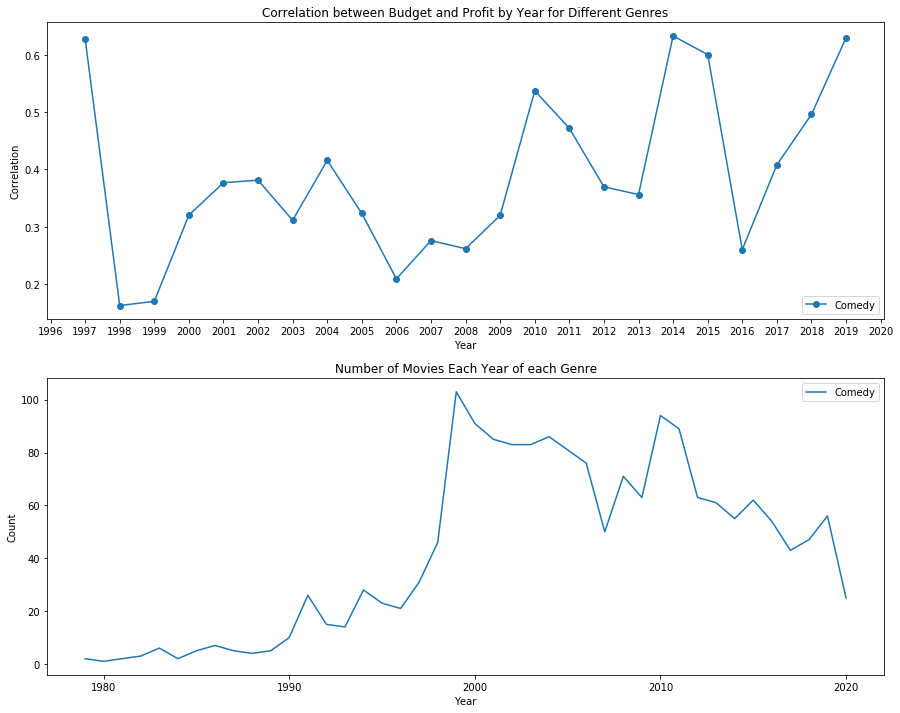

In [9]:
correlater(["Comedy"],budget_df)

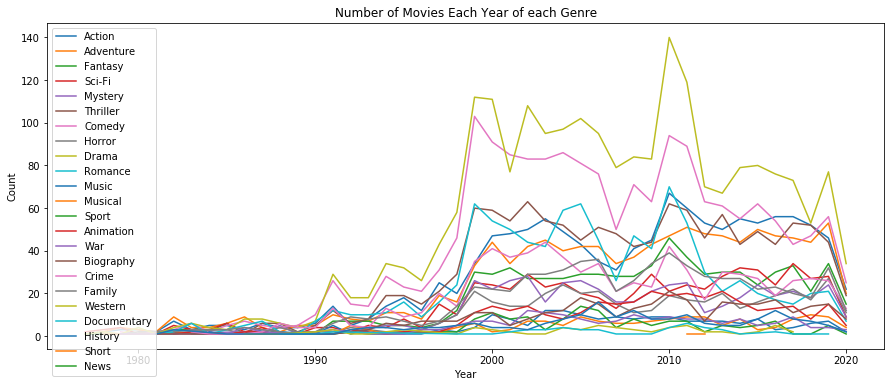

In [10]:
correlater(genres,budget_df,which=(False,True))

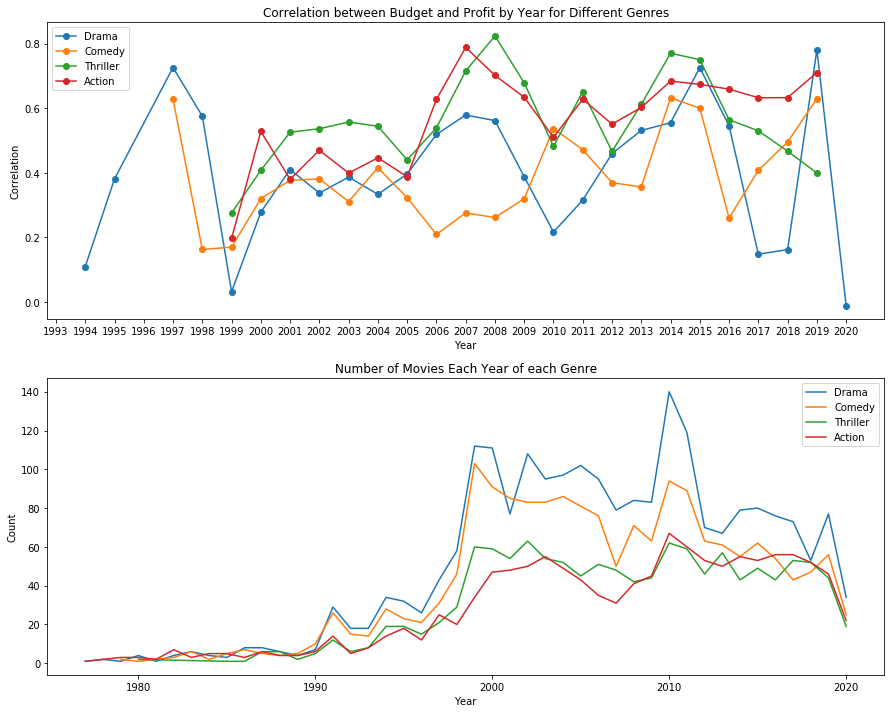

In [11]:
top4 = list(budget_df[genres].sum().sort_values(ascending=False)[0:4].index)
correlater(top4,budget_df)

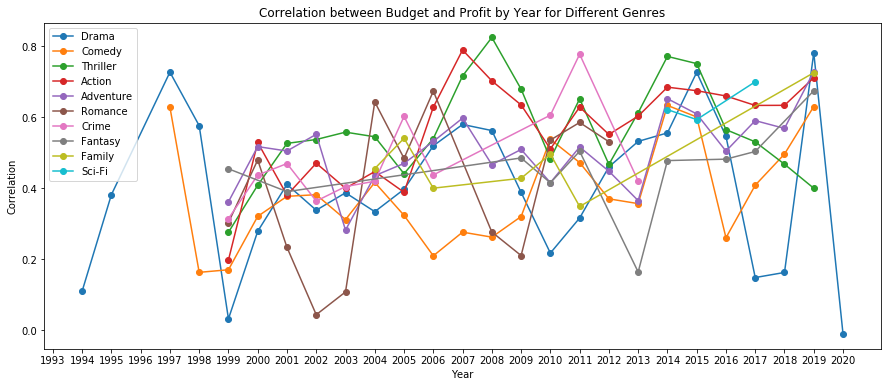

In [12]:
top10 = list(budget_df[genres].sum().sort_values(ascending=False)[0:10].index)
correlater(top10,budget_df,which=(True,False))

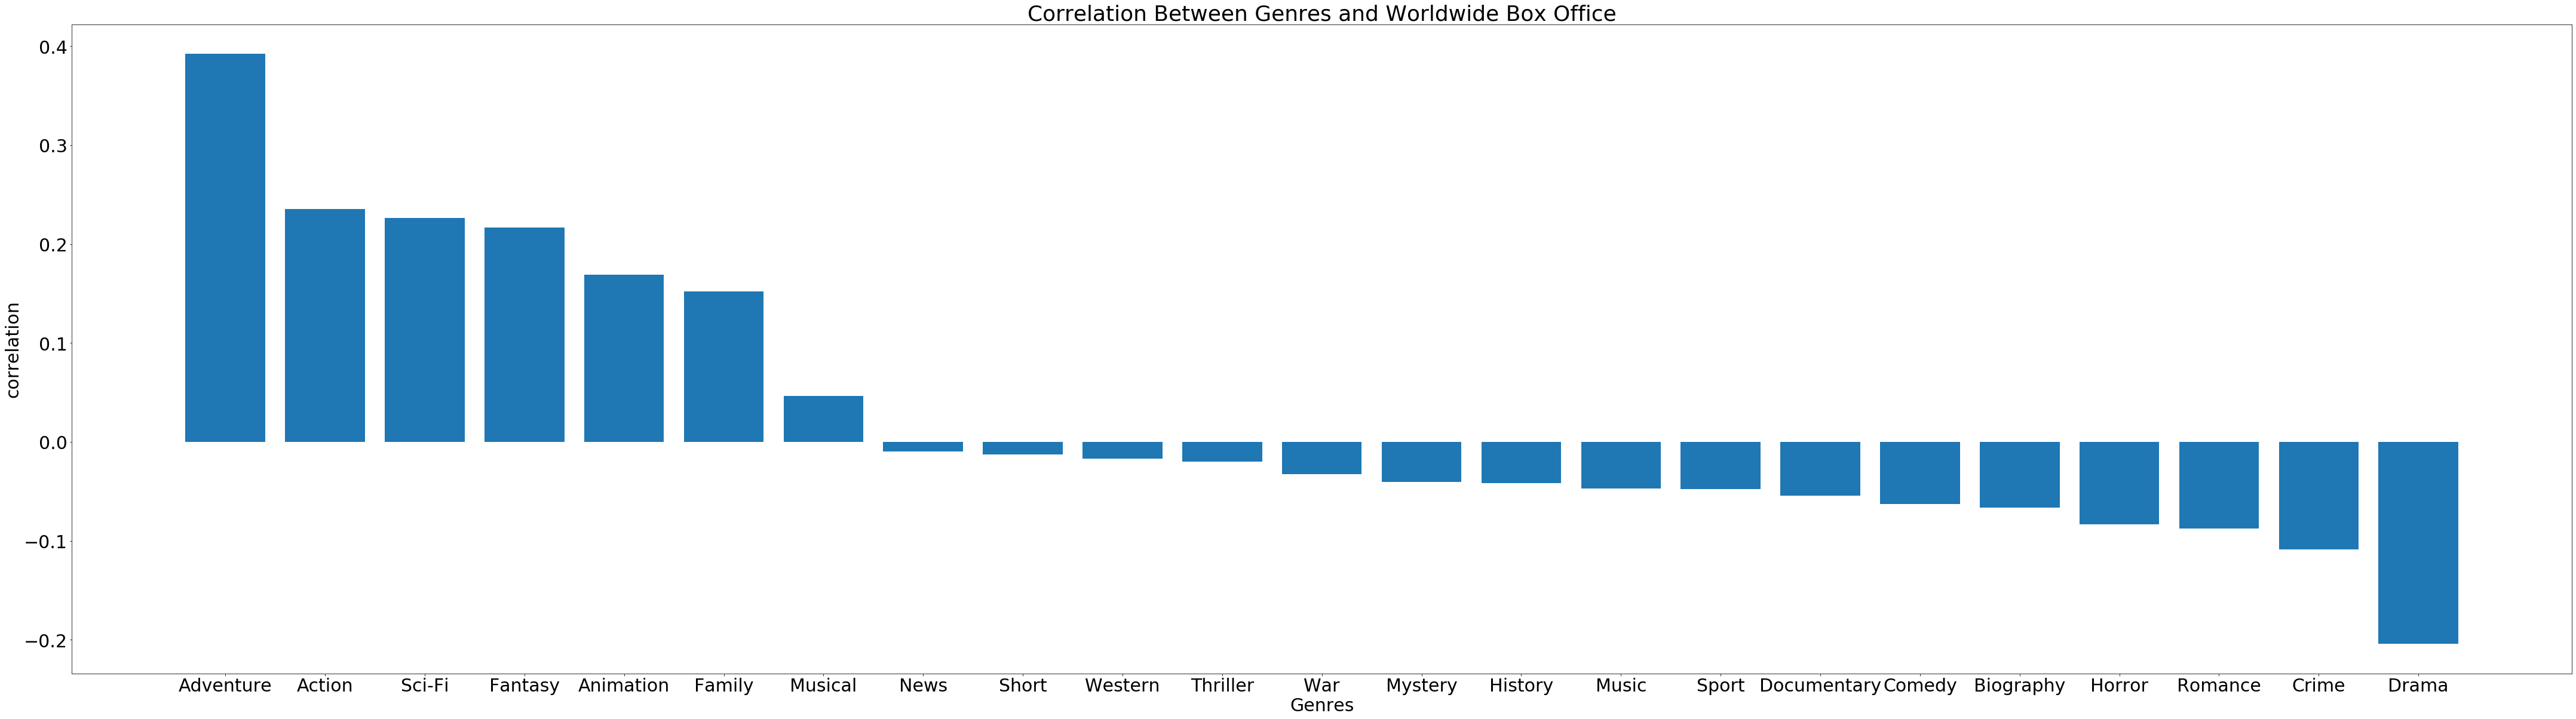

In [13]:
plt.rcParams.update({'font.size': 30})
fig, ax = plt.subplots(figsize=(75,20))
#plt.figure(figsize=(25,5))
ax.set_title("Correlation Between Genres and Worldwide Box Office")
ax.set_xlabel("Genres")
ax.set_ylabel("correlation")
ax.bar(corr_df.index,corr_df["worldwide"])
plt.savefig("figures/newest-genres-box-office.png")